```{contents}
```


# PCA

**Principal Component Analysis (PCA)** is a **dimensionality reduction technique** that transforms high-dimensional data into a lower-dimensional space, while **retaining as much variance (information) as possible**.

* Think of it as finding the “best perspective” to look at your data, where the structure or patterns are most visible.
* Common uses:

  * Visualization (2D or 3D plots)
  * Noise reduction
  * Preprocessing for machine learning

---

## Intuition Behind PCA

Imagine you have 3D data points forming a thin, elongated cloud:

* Most points vary along a diagonal direction.
* The other two directions have very little spread (variance).
* PCA identifies the direction of **maximum variance** (Principal Component 1), then the next orthogonal direction of maximum remaining variance (PC2), and so on.

By projecting data onto the top principal components:

* You keep the most important information.
* Ignore directions that contribute little (low variance → likely noise or redundancy).

---

## Steps in PCA

1. **Standardize the data**

   * Subtract the mean of each feature (centering) and scale to unit variance if features are on different scales.

2. **Compute the covariance matrix**

   * Measures how each pair of features varies together.

   $$
   \Sigma = \frac{1}{n-1} X^T X
   $$

3. **Compute eigenvectors and eigenvalues of covariance matrix**

   * **Eigenvectors** = principal components (directions in feature space)
   * **Eigenvalues** = variance along each principal component

4. **Sort eigenvectors by eigenvalues**

   * Keep top $k$ components that explain most variance (e.g., 95%)

5. **Project original data onto these top components**

   * This gives the reduced-dimensional representation:

   $$
   X_{reduced} = X \cdot W
   $$

   Where $W$ is the matrix of top eigenvectors.

---

## Mathematical Representation

* Original data: $X \in \mathbb{R}^{n \times d}$ (n samples, d features)
* Covariance matrix: $\Sigma = \frac{1}{n-1} X^T X$
* Eigen decomposition: $\Sigma v_i = \lambda_i v_i$

  * $v_i$ = eigenvector (principal component)
  * $\lambda_i$ = eigenvalue (variance explained)
* Dimensionality reduction: project onto top k eigenvectors with largest eigenvalues.

---

## How PCA Reduces Dimensionality

* High-dimensional data often has correlated or redundant features.
* PCA combines correlated features into principal components.
* You keep only the most informative components → smaller feature space, less noise.

---

## Example

* Suppose you have a dataset with **3 features**:

  * Height, weight, and BMI
* Height and weight are correlated → first principal component (PC1) might capture the “overall body size”
* Second component (PC2) captures the small variation not explained by PC1
* You could project your 3D data onto **2D (PC1 and PC2)** and retain almost all variance.

---

## Benefits of PCA

* Reduces dimensionality → faster computation
* Removes noise → better model performance
* Helps visualization in 2D/3D
* Mitigates the **curse of dimensionality**

---

## Limitations

* PCA is **linear** → may not capture non-linear relationships
* Principal components are **not always interpretable**
* Variance ≠ importance for predictive tasks → sometimes supervised feature selection is better

---


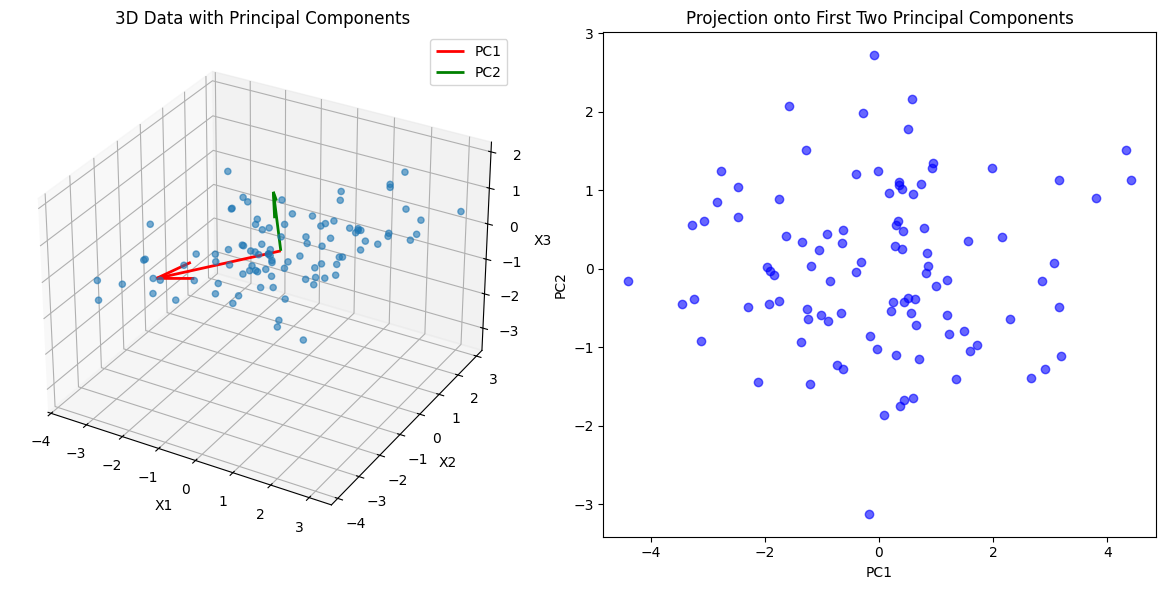

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample 3D data
np.random.seed(42)
n_samples = 100
mean = [0, 0, 0]
cov = [[3, 2, 0.5],
       [2, 2, 0],
       [0.5, 0, 1]]
X = np.random.multivariate_normal(mean, cov, n_samples)

# Compute PCA
X_meaned = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_meaned.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]
eigenvalues = eigenvalues[idx]

# Top 2 components for projection
W = eigenvectors[:, :2]
X_pca = X_meaned.dot(W)

# Plot 3D scatter and PCA vectors
fig = plt.figure(figsize=(12,6))

# 3D Scatter
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=0.6)
origin = np.mean(X, axis=0)
for i in range(2):
    vec = eigenvectors[:,i] * 3  # scale for visibility
    ax.quiver(origin[0], origin[1], origin[2],
              vec[0], vec[1], vec[2],
              color=['r','g'][i], linewidth=2, label=f'PC{i+1}')
ax.set_title('3D Data with Principal Components')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()

# 2D Projection
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, color='b')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Projection onto First Two Principal Components')

plt.tight_layout()
plt.show()
